# Hypotheses and Outline

The problem we are addressing is understanding the pricing of flights in the United States. Flight pricing is influenced by numerous factors, such as the carrier, the departure and destination locations, and the duration of the flight. However, there are also external factors beyond our control, such as travel patterns and market demand. While the complexities and uncertainties surrounding flight pricing mean it cannot be fully predicted, we can better understand these dynamics by narrowing our focus to factors we can analyze and model.

**Hypothesis 1:** Our hypothesis is that there is a positive correlation between the distance of the flight and the ticket price, or that longer flights tend to have higher ticket prices.

**Hypothesis 2:** We believe that flights from major airports are priced higher than flights from smaller, regional airports.

####Key Steps for Analysis

Our analysis process involves several key steps: identifying predictor and target variables, extracting and preprocessing the data, splitting it into training and testing datasets, visualizing the data to identify trends and patterns, training models using the training dataset, evaluating the models on the test dataset, and computing performance metrics. For continuous variables, we will calculate the Mean Squared Error (MSE) and R² scores, while for categorical variables, we will assess performance using F1 scores and accuracy.








####Assesing Hypothesis Validity

**For hypothesis 1:** When looking at the results of our analysis to assess the validity of our hypothesis, we will first look at the MSE and R2 scores of each model. If the R2 score is high (close to 1), we will conclude that the model performed well, assuming the MSE is low. We will then check the coefficients from our model to see if it is positive, meaning that there is a positive correlation between fare and distance, and conclude that our hypothesis is valid. Now, if none of the models have a high R2 score, we will conclude that there is not a strong correlation between fare and distance and that our hypothesis in not valid.

**For hypothesis 2:** To assess the validity of our hypothesis, we will rely on classification metrics such as accuracy and F1 scores to evaluate model performance. A high F1 score would indicate that the models effectively differentiated between major and regional airports based on the features, suggesting that airport type is meaningfully influenced by these factors. We will also examine the coefficients in the linear regression model. If the coefficient is positive, it would support the idea that major airports are associated with higher fares. However, if it was negative or the classification metrics indicated poor model performance, we would conclude that our hypothesis may not be valid.

# Describing the Data

**For hypothesis 1:** Our predictor variable will be nsmiles (distance between airports in miles) and our target variable will be fare (average fare in dollars).

**For hypothesis 2:** Our predictor variable will be fare (average fare in dollars), and our target variable will be airport type (regional or major)

The dataset we will be working with contains detailed information about airline flights in the United States from 1993 to 2024. The dataset had some missing values, and many outliers, so we we removed all outliers and dropped any missing values to continue with our analysis.

Source citation: Bhavik Jikadara, US Airline Flight Routes and Fares 1993-2024.

The dataset we will be working with was found through kaggle, where the dataset is derived from governmental transportation databases, airline reporting systems, and industry research. The data set has been maintained to provide information about air travel within the United States over the last 30 years. the dataset contains both categorical and numerical variabels, but the variables we will be working with are all continuous varibales since we will be looking at price and distance.

### Import Neccesary Libraries

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import IPython.display
%cd '/content/drive/MyDrive/Final Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1jMxE7nUbr66tRandi2Fs7yuPftAeqkho/Final Project


#**HYPOTHESIS 1**

### Pre Processing

In [ ]:
# Extract Raw Data
data = pd.read_csv("flights.csv")
x = data.loc[:, ['nsmiles']] ## Predictor Variable
y = data.loc[:, ['fare']] ## Target Variable

In [ ]:
data.head() ## Look at Data

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [ ]:
data.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [ ]:
data.dtypes ## Identify Data Types

,0
tbl,object
Year,int64
quarter,int64
citymarketid_1,int64
citymarketid_2,int64
city1,object
city2,object
airportid_1,int64
airportid_2,int64
airport_1,object


In [ ]:
print((data.columns)) # Identify columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')


In [ ]:
# Remove Outliers to Improve Accuracy of model
model = IsolationForest(contamination = 0.01)
outliers = model.fit_predict(y)

y = y[outliers == 1]
data['fare'] = y
data.dropna(inplace = True) # Drop Null Values to ensure accurate model

In [ ]:
# Extract New Data
x = data.loc[:, ['nsmiles']] ## Predictor Variable
y = data.loc[:, ['fare']] ## Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) ## Train/Test Split, Setting test_size and random_state

## Visualizations

Text(0, 0.5, 'fare (US Dollars)')

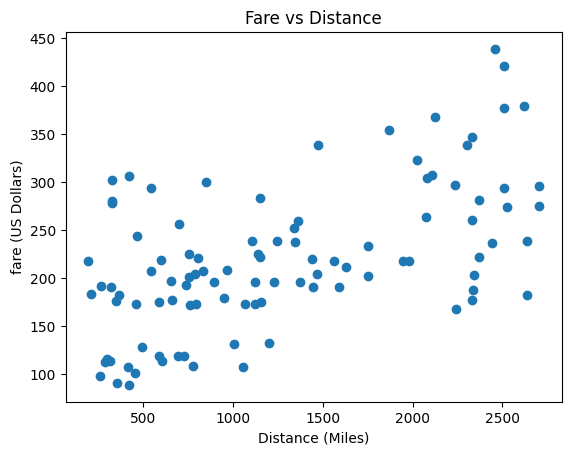

In [ ]:

# Plot New Data
plt.scatter(x_train[0:100], y_train[0:100])
plt.title('Fare vs Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('fare (US Dollars)')

This scatter plot illustrates the relationship between flight distance and fare prices. It shows a general trend where longer distances tend to have higher fares, although there is considerable variability in fare prices for flights covering similar distances. This variability could be influenced by other factors not displayed on this plot, such as flight class, airline, or time of booking.

             nsmiles           fare
count  203343.000000  203343.000000
mean     1182.844711     212.952547
std       702.083050      71.616618
min       109.000000      57.730000
25%       625.000000     161.580000
50%      1014.000000     206.080000
75%      1709.000000     258.570000
max      2724.000000     461.030000


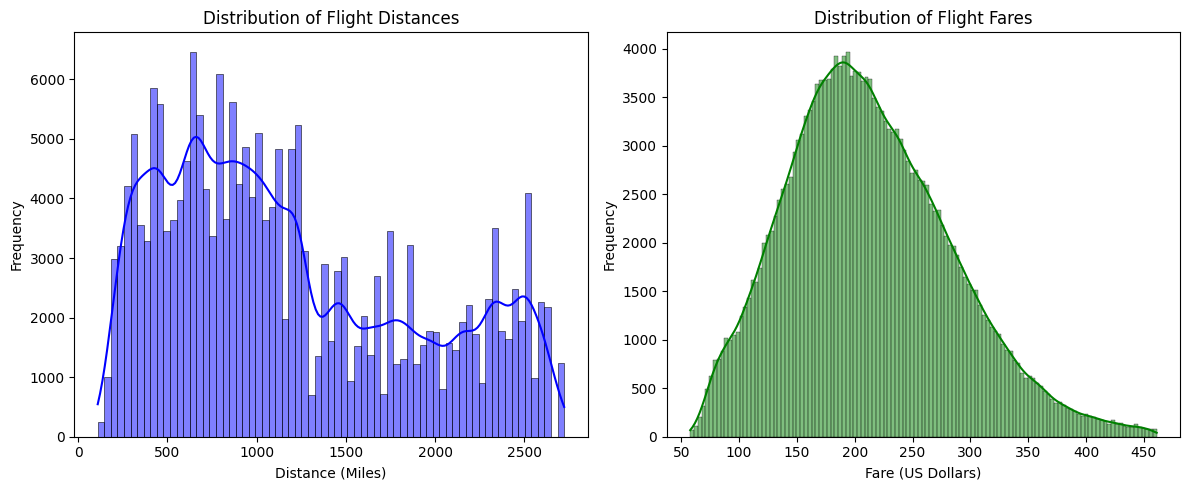

In [ ]:

statistics = data[['nsmiles', 'fare']].describe() ## Acquire useful statistical measures with nsmiles and fare's

# Print statistics
print(statistics)

# Histograms for fare and nsmiles
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['nsmiles'], kde=True, color='blue')
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (Miles)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['fare'], kde=True, color='green')
plt.title('Distribution of Flight Fares')
plt.xlabel('Fare (US Dollars)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

These histograms provide a visual representation of the distribution of flight distances and fares. The left graph showing the distribution of flight distances suggests that certain flight distances are more common than others, possibly reflecting popular flight routes or typical distances between major city pairs. On the right, the distribution of flight fares follows a right-skewed pattern, indicating that most fares are low to moderate, with fewer instances of very high fares. This skewness could imply that while most flights are economically priced to attract the maximum number of passengers, there exists premium options that are significantly more expensive.

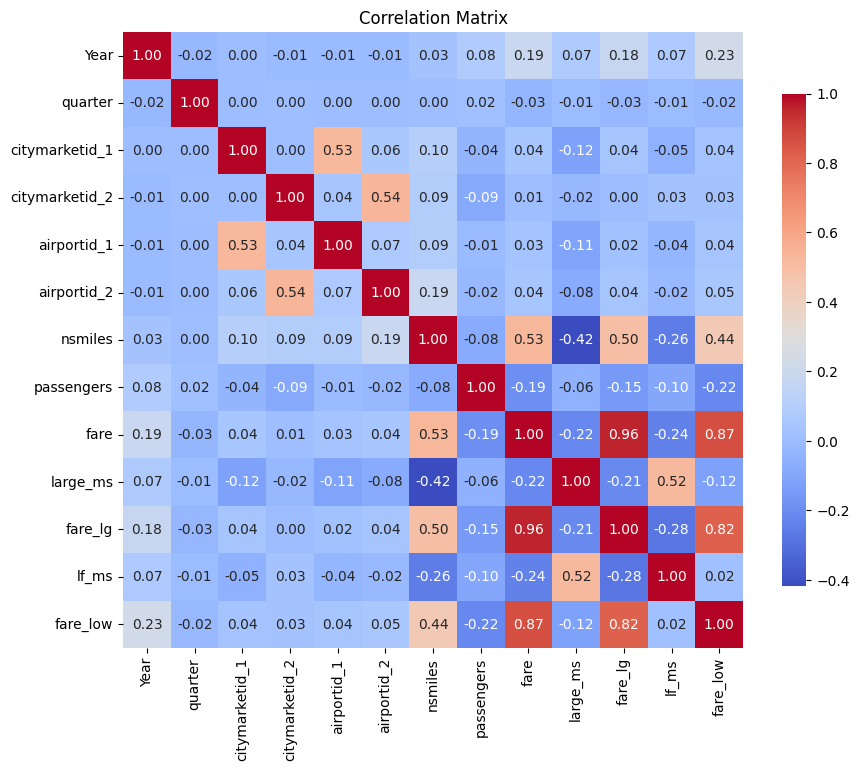

In [ ]:
numerical_data = data.select_dtypes(exclude=['object', 'category'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

Notice in our correlation matrix, there are several variables with moderate to high correlation. nsmiles and fare have a .53 correlation to each other, suggesting their exists a relationship between these 2 variables, although not as strong.

# Linear Regression Model

Text(0, 0.5, 'Fare (US Dollars)')

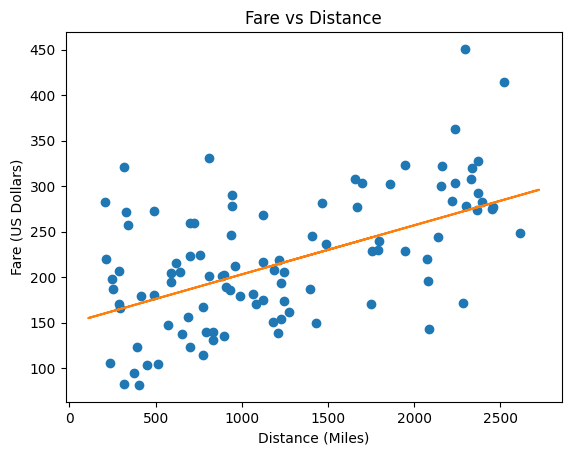

In [ ]:
# Fit Linear Regression Model
lm = LinearRegression()
lm.fit(x_train, y_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

# Show Model
plt.scatter(x_test[0:100], y_test[0:100])
plt.plot(x_test, yhat_test, c = 'C1')
plt.title('Fare vs Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare (US Dollars)')

In [ ]:
# Show Results
print("Train")
print('MSE -', np.mean((y_train - yhat_train)**2))
print('R2 - ', lm.score(x_train, y_train))
print()
print("Test")
print('MSE -', np.mean((y_test - yhat_test)**2))
print('R2 - ', lm.score(x_test, y_test))

Train
MSE - 3685.4381661109223
R2 -  0.2802410417932283

Test
MSE - 3710.809812605918
R2 -  0.27889429929565757


We can see that the Linear Regression model generalizes fairly well because the MSE values are very simiar while the R2 scores are also almost the same for the train and test data sets. However, the model is not very accurate because the R2 score is very low. The R2 score of about 0.28 means that this model can only explain about 28% of the variance of the data, which is not good. Therefore, the models overall performance is not great because of the low R2 score.  

In [ ]:
# Show Results
print('Slope -    ', lm.coef_[0][0])
print('Intercept -', lm.intercept_[0])

Slope -     0.053959791153922805
Intercept - 148.9840628041182


What we can get from this model is that the fare follows a linear pattern with an intercept (or starting fare) of approximately 148.84, and a slope (or increase in fare per mile) of about 0.05. Note that these numbers are in US dollars. Let's try a different model.

# Random Forest Model

Text(0, 0.5, 'Fare (US Dollars)')

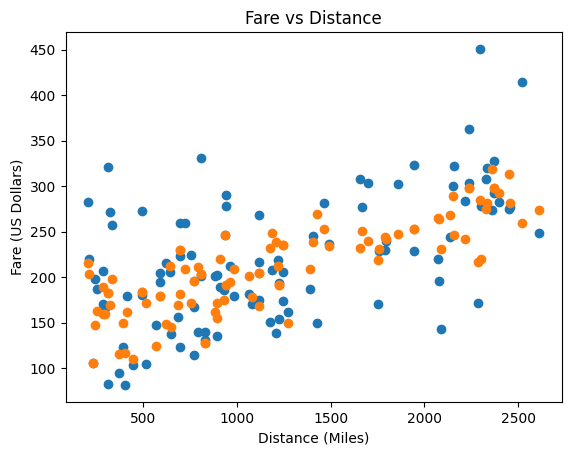

In [ ]:
# Fit Random Forest Model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)
yhat_train = rfr.predict(x_train)
yhat_test = rfr.predict(x_test)

# Show Model
plt.scatter(x_test[0:100], y_test[0:100])
plt.scatter(x_test[0:100], yhat_test[0:100], c = 'C1')
plt.title('Fare vs Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare (US Dollars)')

This scatter plot visualizes the relationship between flight distances and fares using actual data (in blue) and predictions from a Random Forest Regressor model (in orange). The blue points represent actual fares for the test data, plotted against their respective distances. In contrast, the orange points represent the fares predicted by the Random Forest model for the same set of distances in the test dataset.

In [ ]:
# Show Results
print("Train")
print('MSE -', mean_squared_error(y_train, yhat_train))
print('R2 - ', rfr.score(x_train, y_train))
print()
print("Test")
print('MSE -', mean_squared_error(y_test, yhat_test))
print('R2 - ', rfr.score(x_test, y_test))

Train
MSE - 2682.0695921319434
R2 -  0.47619698704426794

Test
MSE - 2740.2289647678276
R2 -  0.46750309837582427


We can see that the Random Forest model also generalizes fairly well because it also has very similar MSE and R2 scores for both the train and test data sets. However, this model is also not very accurate because the R2 scores are about 0.47, meaning that the model can ony explain about 47% of the variance in the data. Therefore, the overall performance of that model is also not very good because of the low R2 score.

Text(0, 0.5, 'Fare (US Dollars)')

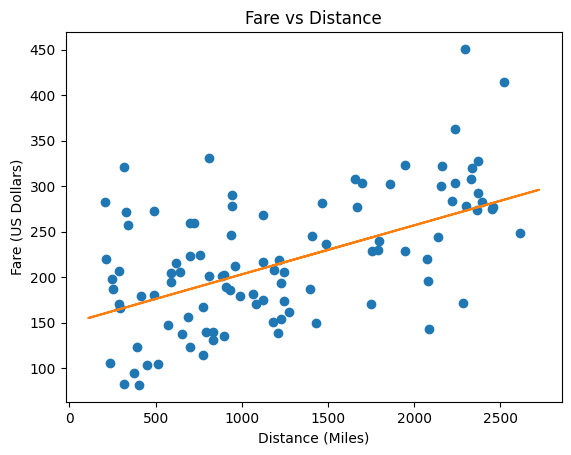

In [ ]:
# Fit Linear Regression Model to Results of Random Forest Model
lm.fit(x_train, yhat_train)
yhat_train = lm.predict(x_train)
yhat_test = lm.predict(x_test)

# Show Model
plt.scatter(x_test[0:100], y_test[0:100])
plt.plot(x_test, yhat_test, c = 'C1')
plt.title('Fare vs Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('Fare (US Dollars)')

In [ ]:
# Show Results
print('Slope -    ', lm.coef_[0])
print('Intercept -', lm.intercept_)

Slope -     0.05394247747751763
Intercept - 149.01717658092224


When we look at the pattern that the Random Forest model follows, we get a very similar linear relationship between fare and distance. The pattern suggests that there is an intercept of about 148.86 and a slope of about 0.05. Let's explore numerous other models and compare them with each other.

# Other Models

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
model_1 = LinearRegression()
model_2 = Lasso()
model_3 = Ridge()
model_4 = ElasticNet()
model_5 = KNeighborsRegressor()
model_6 = DecisionTreeRegressor()
model_7 = RandomForestRegressor()
model_8 = BaggingRegressor()
model_9 = ExtraTreesRegressor()
model_10 = AdaBoostRegressor()
model_11 = XGBRegressor(verbose=0)
model_12 = LGBMRegressor(verbose=0)

In [ ]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)
model_4.fit(x_train,y_train)
model_5.fit(x_train,y_train)
model_6.fit(x_train,y_train)
model_7.fit(x_train,y_train)
model_8.fit(x_train,y_train)
model_9.fit(x_train,y_train)
model_10.fit(x_train,y_train)
model_11.fit(x_train,y_train)
model_12.fit(x_train,y_train)

LGBMRegressor(verbose=0)

In [ ]:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12]
models_names = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'XGBRegressor', 'LGBMRegressor']

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse:.2f}')

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]
r2_scores = [r2_score(y_test, model.predict(x_test)) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'R2 Score': [f'{round(score * 100, 2)}%' for score in r2_scores],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

model_score

,Model,Train score,Test score,R2 Score,Ratio difference,Evaluate model,Squared error
0,LinearRegression,28.02%,27.89%,27.89%,0.13%,bad,3710.81
1,Lasso,28.02%,27.89%,27.89%,0.13%,bad,3710.81
2,Ridge,28.02%,27.89%,27.89%,0.13%,bad,3710.81
3,ElasticNet,28.02%,27.89%,27.89%,0.13%,bad,3710.81
4,KNeighborsRegressor,36.41%,35.53%,35.53%,0.89%,bad,3317.79
5,DecisionTreeRegressor,47.63%,46.74%,46.74%,0.89%,bad,2740.71
6,RandomForestRegressor,47.62%,46.76%,46.76%,0.86%,bad,2739.98
7,BaggingRegressor,47.58%,46.7%,46.7%,0.88%,bad,2742.61
8,ExtraTreesRegressor,47.63%,46.74%,46.74%,0.89%,bad,2740.90
9,AdaBoostRegressor,19.81%,20.14%,20.14%,-0.33%,bad,4109.64


Since both the Linear Regression and Random Forest models did not have very good accuracy, we went ahead and fit many other models to see if any of them would do any better. We can see that from the table above (by looking at the train and test scores as well as the squared error), none of the models could surpass the performance of the Random Forest model, even though some that had similar performance. Therefore, we can conclude that the best model to predict fare given distance is the Random Forest model (which is not good).

# A Different Approach(Including Year)

In [ ]:
# Extract Raw Data
data_new = pd.read_csv("flights.csv")
x_new = data.loc[:, ['nsmiles', 'Year']] ## Predictor Variable
y_new = data.loc[:, ['fare']] ## Target Variable

In [ ]:
# Remove Outliers to Improve Accuracy of model
model = IsolationForest(contamination = 0.01)
outliers = model.fit_predict(y_new)

y_new = y_new[outliers == 1]
data_new['fare'] = y_new
data_new.dropna(inplace = True) # Drop Null Values to ensure accurate model

In [ ]:
# Extract New Data
x_new = data.loc[:, ['nsmiles', 'Year']] ## Predictor Variable
y_new = data.loc[:, ['fare']] ## Target Variable

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.25, random_state=42)

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)
yhat_train = rfr.predict(x_train)
yhat_test = rfr.predict(x_test)

In [ ]:
# Show Results
print("Train")
print('MSE -', mean_squared_error(y_train, yhat_train))
print('R2 - ', rfr.score(x_train, y_train))
print()
print("Test")
print('MSE -', mean_squared_error(y_test, yhat_test))
print('R2 - ', rfr.score(x_test, y_test))

Train
MSE - 1786.4159257226156
R2 -  0.6510435366337413

Test
MSE - 2145.616069274783
R2 -  0.5839804355334768


Notice the improvements in our model when adding year instead of just nsmiles. This could be the case because as the year's pass, the price of every flight typically goes up in order to keep up with inflation. Thus, in this model we are not only using miles but we are also taking into consideration the year it is.

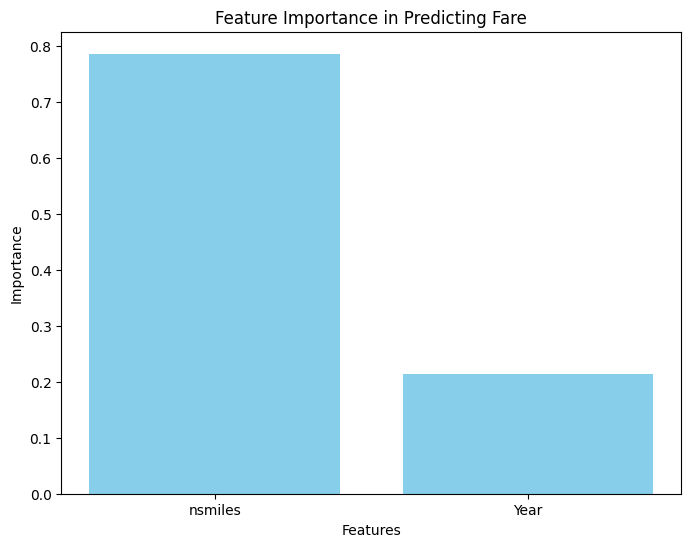

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rfr.feature_importances_
features = ['nsmiles', 'Year']

plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Fare')
plt.show()


Comparing the importance of the features we use, we notice that nsmiles is vastly more important than year, however, using both ensures the accuracy of our model.

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

model_1 = LinearRegression()
model_2 = Lasso()
model_3 = Ridge()
model_4 = ElasticNet()
model_5 = KNeighborsRegressor()
model_6 = DecisionTreeRegressor()
model_7 = RandomForestRegressor()
model_8 = BaggingRegressor()
model_9 = ExtraTreesRegressor()
model_10 = AdaBoostRegressor()
model_11 = XGBRegressor(verbose=0)
model_12 = LGBMRegressor(verbose=0)



In [ ]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)
model_4.fit(x_train,y_train)
model_5.fit(x_train,y_train)
model_6.fit(x_train,y_train)
model_7.fit(x_train,y_train)
model_8.fit(x_train,y_train)
model_9.fit(x_train,y_train)
model_10.fit(x_train,y_train)
model_11.fit(x_train,y_train)
model_12.fit(x_train,y_train)

LGBMRegressor(verbose=0)

In [ ]:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12]
models_names = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'BaggingRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'XGBRegressor', 'LGBMRegressor']

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse:.2f}')

# Calculate train and test scores:
train_score = [model.score(x_train, y_train) for model in models]
test_score = [model.score(x_test, y_test) for model in models]
r2_scores = [r2_score(y_test, model.predict(x_test)) for model in models]

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10:
        rate.append('middle')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Model': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'R2 Score': [f'{round(score * 100, 2)}%' for score in r2_scores],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

model_score

,Model,Train score,Test score,R2 Score,Ratio difference,Evaluate model,Squared error
0,LinearRegression,30.9%,30.93%,30.93%,-0.03%,bad,3562.48
1,Lasso,30.9%,30.92%,30.92%,-0.02%,bad,3562.57
2,Ridge,30.9%,30.93%,30.93%,-0.03%,bad,3562.48
3,ElasticNet,30.9%,30.92%,30.92%,-0.02%,bad,3562.60
4,KNeighborsRegressor,59.85%,53.93%,53.93%,5.92%,bad,2376.14
5,DecisionTreeRegressor,65.18%,57.92%,57.92%,7.26%,middle,2170.15
6,RandomForestRegressor,65.1%,58.39%,58.39%,6.72%,middle,2146.26
7,BaggingRegressor,64.83%,58.05%,58.05%,6.78%,bad,2163.55
8,ExtraTreesRegressor,65.18%,57.94%,57.94%,7.24%,middle,2169.11
9,AdaBoostRegressor,24.26%,24.6%,24.6%,-0.34%,bad,3888.83


# Conclusions and Implications

In conclusion, since none of the models could explain at least half of the variance in the data, we cannot confidently say that there is a positive correlation between fare and distance. Therefore, our hypothesis is not valid.

Taking another look at our final model's results,

our model suggest that if there was a positive correlation between fare and distance, the fare for a flight follows a linear pattern with an intercept of 148.86 (US Dollars) and a slope of 0.05 (US Dollars per mile). To put this into perspective, our model says that the difference in fares for a flight that is 500 miles and another flight that is 1000 miles should be $25.

In the future, we could take this a step further and see how distance affects the fare for different carriers to see if some carriers have a higher increase in fares per mile, or if some carriers have no increase in fares per mile. Another question we could ask is how the fares differ from flights with layovers. We could then look into how the distance could be affected in the case where the first stop is not in-line with the final destination and how the fare fo that flight would compare to the fare of a flight that goes straight to the final destination.

Some limitations of our analysis is that we are assuming we have perfect conditions with no delays or problems of any kind, which we know is not always the case. So if we can find a way to take into account some outside factors that might also affect the fare, we would be able to more accurately predict the correlation between distance and fares. Another limitation of our analysis is that we simply did not check for any interaction between features. Like we said for implications for future work, we could check if there is an interraction between distance and carriers to see if the models could then explain more of the variation in the data.

#**HYPOTHESIS 2**

### Pre Processing

In [ ]:
data = pd.read_csv("flights.csv")

We will create a new variable 'new_data' which only includes the necessary columns for predicting aiport type.

In [ ]:
new_data = data.drop(['tbl', 'citymarketid_1', 'citymarketid_2', 'city2', 'airportid_1',
    'airportid_2', 'airport_2', 'carrier_low', 'lf_ms', 'fare_low',
    'Geocoded_City1', 'Geocoded_City2', 'tbl1apk'], axis = 1)

new_data

,Year,quarter,city1,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg
0,2021,3,"Allentown/Bethlehem/Easton, PA",ABE,970,180,81.43,G4,1.0000,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA",ABE,970,19,208.93,DL,0.4659,219.98
2,2021,3,"Albuquerque, NM",ABQ,580,204,184.56,WN,0.9968,184.44
3,2021,3,"Albuquerque, NM",ABQ,580,264,182.64,AA,0.9774,183.09
4,2021,3,"Albuquerque, NM",ABQ,328,398,177.11,WN,0.6061,184.49
...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN",TYS,665,207,278.70,DL,0.7503,287.44
245951,2024,1,"Knoxville, TN",TYS,724,277,148.69,G4,0.8255,114.45
245952,2024,1,"Knoxville, TN",TYS,724,70,330.19,AA,0.8057,321.92
245953,2024,1,"Knoxville, TN",TYS,550,178,95.65,G4,1.0000,95.65


In [ ]:
#Extract, print, and count unique values
unique_airports = data['airport_1'].unique()
print(unique_airports)
print(len(unique_airports))

['SLC' 'COS' 'PIT' 'LAS' 'HSV' 'MCI' 'ORD' 'ALB' 'PVD' 'MIA' 'BNA' 'IAH'
 'DAL' 'ELP' 'LGA' 'CLT' 'MHT' 'ISP' 'CHS' 'CHI' 'GSO' 'OKC' 'MDW' 'CLE'
 'CAK' 'BDL' 'SWF' 'SYR' 'GSP' 'DFW' 'LAX' 'CMH' 'BOS' 'BHM' 'BWI' 'SNA'
 'ONT' 'OAK' 'SMF' 'ATL' 'MSY' 'DTT' 'HOU' 'MKE' 'PHX' 'SAN' 'FLL' 'PDX'
 'DAY' 'BUR' 'HPN' 'JAX' 'JFK' 'SEA' 'EWR' 'SDF' 'GRR' 'LGB' 'BOI' 'DEN'
 'LIT' 'TPA' 'AUS' 'BTR' 'DTW' 'NYC' 'BUF' 'PHF' 'FNT' 'PHL' 'ABQ' 'DSM'
 'TUL' 'SJC' 'STL' 'RSW' 'MYR' 'XNA' 'SFO' 'MSN' 'AMA' 'ACY' 'CVG' 'MEM'
 'TYS' 'IND' 'CAE' 'EFD' 'MSP' 'RNO' 'ORF' 'MCO' 'EYW' 'JAN' 'EUG' 'IAD'
 'BTV' 'PWM' 'SAT' 'RIC' 'PNS' 'PSP' 'CRP' 'DAB' 'OMA' 'SAC' 'ROC' 'AVL'
 'ABE' 'DET' 'RDU' 'HRL' 'SAV' 'MLB' 'AIY' 'GEG' 'AZA' 'LEX' 'BGR' 'TUS'
 'TSS' 'SRQ' 'MVY' 'CID' 'DCA' 'BLI' 'ASE' 'CGX' 'GPT' 'EGE' 'FAR' 'TLH'
 'FAT' 'FTW' 'BMI' 'MDT' 'JAC' 'MGM' 'ACK' 'ECP' 'MFR' 'BZN' 'SBN' 'LCK'
 'MKC' 'LAN' 'AGS' 'VPS' 'MOB' 'PIE' 'BIL' 'MOT' 'BHC' 'RDM' 'FWA' 'GYY'
 'FMY' 'JRB' 'ORL' 'BIS' 'CHA' 'WAS' 'PIA' 'ACV' 'W

Now we will filter out non-positive values, drop rows with missing data, and scale the passenger column values (multiply by four to get yearly # of passengers)

In [ ]:
to_drop = ['nsmiles', 'passengers','fare','large_ms', 'fare_lg']

new_data = new_data[(new_data[to_drop] > 0).all(axis=1)]

new_data.dropna()
new_data

# Multiply the 'passengers' column by 4
new_data['passengers'] = new_data['passengers'] * 4

# Print the updated dataframe to check the changes
new_data

,Year,quarter,city1,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg
0,2021,3,"Allentown/Bethlehem/Easton, PA",ABE,970,720,81.43,G4,1.0000,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA",ABE,970,76,208.93,DL,0.4659,219.98
2,2021,3,"Albuquerque, NM",ABQ,580,816,184.56,WN,0.9968,184.44
3,2021,3,"Albuquerque, NM",ABQ,580,1056,182.64,AA,0.9774,183.09
4,2021,3,"Albuquerque, NM",ABQ,328,1592,177.11,WN,0.6061,184.49
...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN",TYS,665,828,278.70,DL,0.7503,287.44
245951,2024,1,"Knoxville, TN",TYS,724,1108,148.69,G4,0.8255,114.45
245952,2024,1,"Knoxville, TN",TYS,724,280,330.19,AA,0.8057,321.92
245953,2024,1,"Knoxville, TN",TYS,550,712,95.65,G4,1.0000,95.65


In [ ]:
#Check for duplicates and drop them
duplicates = new_data.duplicated().sum()
print("Total duplicates: " , duplicates)

Total duplicates:  0


In [ ]:
new_data = new_data.drop_duplicates()

In [ ]:
unique_airports = new_data['airport_1'].unique()
print(unique_airports)
print(len(unique_airports))

['ABE' 'ABQ' 'ACK' 'COS' 'DAL' 'DFW' 'PIT' 'HSV' 'ALB' 'AMA' 'DEN' 'ATL'
 'AUS' 'AVL' 'TUS' 'AZA' 'PHX' 'BDL' 'SEA' 'BHM' 'ELP' 'CAK' 'CLE' 'BNA'
 'BOI' 'BOS' 'MHT' 'PVD' 'BTV' 'BUF' 'BZN' 'BWI' 'DCA' 'IAD' 'MDW' 'ORD'
 'CHS' 'CID' 'CLT' 'CMH' 'LCK' 'STL' 'MYR' 'JAX' 'DTW' 'DSM' 'HOU' 'IAH'
 'MCO' 'ECP' 'VPS' 'EUG' 'EYW' 'FAR' 'FCA' 'MSP' 'EWR' 'HPN' 'ISP' 'JFK'
 'LGA' 'SWF' 'RSW' 'GSP' 'GRR' 'GSO' 'LAS' 'IND' 'JAC' 'JAN' 'OAK' 'SFO'
 'SJC' 'FLL' 'MIA' 'BUR' 'LAX' 'LGB' 'ONT' 'SNA' 'LIT' 'SDF' 'CVG' 'SMF'
 'TPA' 'MCI' 'SAT' 'MEM' 'OMA' 'MKE' 'MSN' 'MSY' 'MVY' 'SAN' 'ORF' 'PHF'
 'PNS' 'OKC' 'PDX' 'PHL' 'PSP' 'PWM' 'RDM' 'RDU' 'RNO' 'ROC' 'SLC' 'SAV'
 'SGF' 'SRQ' 'SYR' 'TYS' 'BIS' 'CAE' 'FAT' 'XNA' 'RIC' 'ACY' 'ASE' 'ATW'
 'BGR' 'BIL' 'EGE' 'FNT' 'FWA' 'HRL' 'PAE' 'DTT' 'DAY' 'BTR' 'NYC' 'TUL'
 'CHI' 'EFD' 'CRP' 'DAB' 'SAC' 'DET' 'MLB' 'AIY' 'GEG' 'LEX' 'BLI' 'GPT'
 'TLH' 'BMI' 'MDT' 'MGM' 'MFR' 'SBN' 'LAN' 'AGS' 'FTW' 'MOB' 'MKC' 'MOT'
 'BHC' 'GYY' 'ORL' 'FMY' 'CHA' 'WAS' 'PIA' 'ACV' 'W

After analyzing our data and researching individual airports, we will classify airports with over 13,000 passengers per quarter as major and those with fewer than 13,000 passengers as regional.

In [ ]:
# Group by 'airport_1' and 'Year', then aggregate the data
aggregated_df = new_data.groupby(['airport_1', 'Year']).agg(
    passengers=('passengers', 'sum'),  # Sum the passengers for each airport and year
    flight_count=('airport_1', 'size')  # Count the number of flights (rows) for each airport-year
).reset_index()

aggregated_df


,airport_1,Year,passengers,flight_count
0,ABE,1993,2300,11
1,ABE,1994,424,3
2,ABE,1996,5800,12
3,ABE,1997,3048,7
4,ABE,1998,1888,6
...,...,...,...,...
3843,XNA,2020,1400,11
3844,XNA,2021,1004,5
3845,XNA,2022,6020,24
3846,XNA,2023,7232,28


In [ ]:
# Get summary statistics for passengers and flight_count
summary_stats = aggregated_df[['passengers', 'flight_count']].describe()

print(summary_stats)

         passengers  flight_count
count  3.848000e+03   3848.000000
mean   7.656580e+04     61.865125
std    1.464451e+05     70.064152
min    4.000000e+00      1.000000
25%    4.367000e+03     12.000000
50%    1.765400e+04     31.000000
75%    7.620600e+04     92.000000
max    1.102408e+06    343.000000


In [ ]:
# Find the row with the minimum number of passengers
min_passengers_row = aggregated_df.loc[aggregated_df['passengers'].idxmin()]

# Show the row with the minimum passengers
print(min_passengers_row)

airport_1        ORL
Year            1996
passengers         4
flight_count       1
Name: 2769, dtype: object


We will remove passenger outliers

In [ ]:
# Filter rows where passengers are less than 10
under_10_passengers = aggregated_df[aggregated_df['passengers'] < 10]

# Count the number of rows with passengers under 10
count_under_10 = len(under_10_passengers)

# Show the count and the filtered rows
print(f"Number of rows with fewer than 10 passengers: {count_under_10}")
print(under_10_passengers)

Number of rows with fewer than 10 passengers: 8
     airport_1  Year  passengers  flight_count
738        CHI  2003           8             2
2383       MKC  2000           8             2
2384       MKC  2001           8             2
2769       ORL  1996           4             1
2770       ORL  1997           4             1
3229       SAC  1998           4             1
3230       SAC  2000           4             1
3823       WAS  1997           8             1


In [ ]:
# Define the threshold for passengers per year
passenger_threshold = 13000  # threshold for passengers per year

# Group by both 'airport_1' and 'Year' to get the data per year
yearly_data = aggregated_df.groupby(['airport_1', 'Year']).agg({
    'passengers': 'sum',  # Sum the passengers for each airport in each year
}).reset_index()

# Classify each airport-year combination as Major or Regional based on passengers
yearly_data['airport_type'] = yearly_data.apply(
    lambda row: 'Major' if row['passengers'] > passenger_threshold else 'Regional',
    axis=1
)

# Count how many years for each airport are classified as Major
major_years_count = yearly_data.groupby('airport_1')['airport_type'].apply(lambda x: (x == 'Major').sum())

# Count how many Major airports there are (with at least one "Major" year)
major_airports_count = (major_years_count > 0).sum()

# Count how many Regional airports there are (with no "Major" years)
regional_airports_count = (major_years_count == 0).sum()

# Show the result
print(f"Number of Major airports: {major_airports_count}")
print(f"Number of Regional airports: {regional_airports_count}")

Number of Major airports: 90
Number of Regional airports: 90


In [ ]:
# Define the threshold for passengers per year
passenger_threshold = 13000  # threshold for passengers per year

# Group by both 'airport_1' and 'Year' to get the data per year
yearly_data = aggregated_df.groupby(['airport_1', 'Year']).agg({
    'passengers': 'sum',  # Sum the passengers for each airport in each year
}).reset_index()

# Classify each airport-year combination as Major or Regional based on passengers
yearly_data['airport_type'] = yearly_data.apply(
    lambda row: 'Major' if row['passengers'] > passenger_threshold else 'Regional',
    axis=1
)

# Count how many years for each airport are classified as Major
major_years_count = yearly_data.groupby('airport_1')['airport_type'].apply(lambda x: (x == 'Major').sum())

# Classify airports as "Major" or "Regional" based on if they have any "Major" years
airport_classification = major_years_count.apply(lambda x: 'Major' if x > 0 else 'Regional')

# Add this classification to the original dataframe (aggregated_df)
# We can merge the classification back on 'airport_1'
new_data['airport_type'] = new_data['airport_1'].map(airport_classification)

# Show the result
print(new_data[['airport_1', 'airport_type']].drop_duplicates())

       airport_1 airport_type
0            ABE     Regional
2            ABQ        Major
29           ACK     Regional
33           COS        Major
44           DAL        Major
...          ...          ...
222700       PSC     Regional
227870       FSD     Regional
229814       HHH     Regional
229843       HTS     Regional
235708       HVN     Regional

[180 rows x 2 columns]


In [ ]:
# Filter rows where airport_type is "Regional"
regional_airports = new_data[new_data['airport_type'] == 'Regional']

# Print the result
regional_airports

,Year,quarter,city1,airport_1,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,airport_type
0,2021,3,"Allentown/Bethlehem/Easton, PA",ABE,970,720,81.43,G4,1.0000,81.43,Regional
1,2021,3,"Allentown/Bethlehem/Easton, PA",ABE,970,76,208.93,DL,0.4659,219.98,Regional
29,2021,3,"Nantucket, MA",ACK,218,704,165.27,UA,0.5473,169.32,Regional
30,2021,3,"Nantucket, MA",ACK,218,312,189.08,B6,0.9958,188.57,Regional
31,2021,3,"Nantucket, MA",ACK,218,840,156.66,B6,0.7464,155.54,Regional
...,...,...,...,...,...,...,...,...,...,...,...
245939,2024,1,"Syracuse, NY",SYR,298,244,182.81,WN,0.9982,182.93,Regional
245940,2024,1,"Syracuse, NY",SYR,298,512,218.86,AA,0.9390,219.43,Regional
245941,2024,1,"Syracuse, NY",SYR,298,192,217.89,UA,0.9977,217.67,Regional
245942,2024,1,"Syracuse, NY",SYR,1111,488,136.11,G4,1.0000,136.11,Regional


In [ ]:
# Filter for regional airports and get unique airport codes (airport_1)
regional_airports_codes = new_data[new_data['airport_type'] == 'Regional']['airport_1'].unique()

# Print the regional airport codes
print(regional_airports_codes)
print(len(regional_airports_codes))

['ABE' 'ACK' 'HSV' 'TUS' 'AZA' 'BWI' 'IAD' 'CID' 'LCK' 'ECP' 'VPS' 'EYW'
 'FAR' 'FCA' 'JAC' 'JAN' 'LIT' 'MVY' 'PHF' 'PNS' 'PWM' 'RDM' 'SAV' 'SGF'
 'SRQ' 'SYR' 'BIS' 'CAE' 'FAT' 'XNA' 'RIC' 'ASE' 'ATW' 'BGR' 'BIL' 'EGE'
 'FNT' 'FWA' 'HRL' 'DTT' 'BTR' 'NYC' 'TUL' 'CHI' 'EFD' 'DAB' 'SAC' 'DET'
 'MLB' 'AIY' 'GEG' 'LEX' 'BLI' 'GPT' 'TLH' 'BMI' 'MDT' 'MGM' 'MFR' 'SBN'
 'LAN' 'AGS' 'FTW' 'MOB' 'MKC' 'MOT' 'BHC' 'GYY' 'ORL' 'FMY' 'CHA' 'WAS'
 'PIA' 'ACV' 'WHR' 'GFK' 'CGX' 'PIE' 'USA' 'LBE' 'MSO' 'FNL' 'CHO' 'BLV'
 'IDA' 'PSC' 'FSD' 'HHH' 'HTS' 'HVN']
90


###One-hot Encoding for categorical variables

In [ ]:
# One-hot encode the 'airport_type' column (Major or Regional)
new_data_encoded = pd.get_dummies(new_data, columns=['airport_type'], drop_first=False)

# Convert True/False to 1/0
new_data_encoded['airport_type_Major'] = new_data_encoded['airport_type_Major'].astype(int)
new_data_encoded['airport_type_Regional'] = new_data_encoded['airport_type_Regional'].astype(int)

# Print the updated dataframe with one-hot encoding (with 1 and 0)
print(new_data_encoded.head())

   Year  quarter                           city1 airport_1  nsmiles  \
0  2021        3  Allentown/Bethlehem/Easton, PA       ABE      970   
1  2021        3  Allentown/Bethlehem/Easton, PA       ABE      970   
2  2021        3                 Albuquerque, NM       ABQ      580   
3  2021        3                 Albuquerque, NM       ABQ      580   
4  2021        3                 Albuquerque, NM       ABQ      328   

   passengers    fare carrier_lg  large_ms  fare_lg  airport_type_Major  \
0         720   81.43         G4    1.0000    81.43                   0   
1          76  208.93         DL    0.4659   219.98                   0   
2         816  184.56         WN    0.9968   184.44                   1   
3        1056  182.64         AA    0.9774   183.09                   1   
4        1592  177.11         WN    0.6061   184.49                   1   

   airport_type_Regional  
0                      1  
1                      1  
2                      0  
3             

In [ ]:
# Extract the relevant columns (one-hot encoded airport type and fare)
columns_of_interest = ['airport_type_Major', 'airport_type_Regional', 'fare']  # Replace 'fare' with your actual fare column name

# Subset the dataframe to include only these columns
subset_df = new_data_encoded[columns_of_interest]

# Calculate the correlation matrix for just these columns
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                       airport_type_Major  airport_type_Regional      fare
airport_type_Major               1.000000              -1.000000 -0.010361
airport_type_Regional           -1.000000               1.000000  0.010361
fare                            -0.010361               0.010361  1.000000


## Visualizations

####We will start with a line plot to visualize fare prices over the years

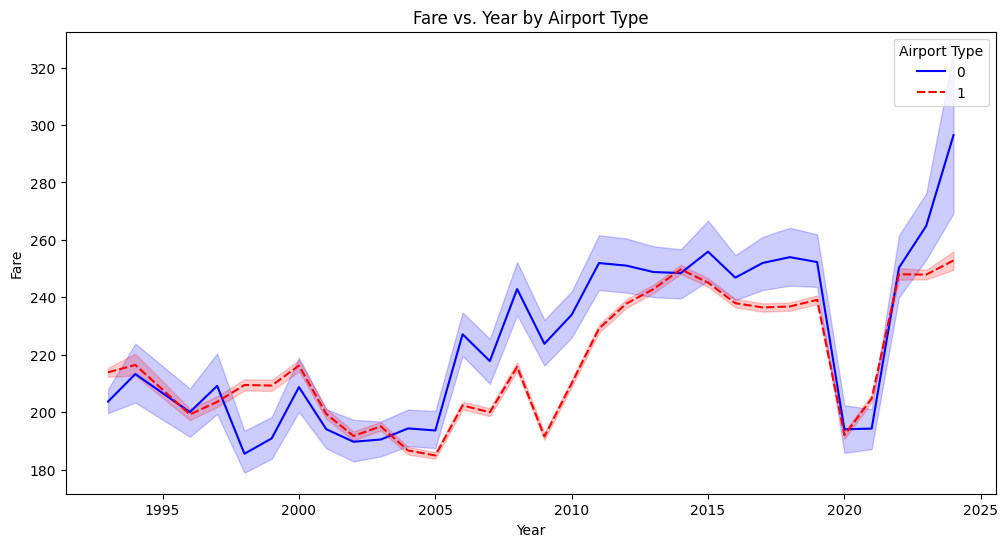

In [ ]:
# line plot with year on the x-axis, fare on the y-axis, and hue for Major vs Regional airports
plt.figure(figsize=(12, 6))

sns.lineplot(data=new_data_encoded, x='Year', y='fare', hue='airport_type_Major',
             palette=['blue', 'red'], style='airport_type_Major', markers=False)

# Label the plot
plt.title('Fare vs. Year by Airport Type')
plt.xlabel('Year')
plt.ylabel('Fare')
plt.legend(title='Airport Type')

plt.show()

From the graph above, we observe that, in general, fare prices at regional airports (0) tend to be higher than those at major airports (1) over the years.

Before 2020, the fare growth for regional airports (blue) was somewhat steadier and closer to the fare growth for major airports (red), with minor fluctuations. However, after 2020, major airports (red) experienced a sharp increase in fares, while regional airports (blue) have a more stable increase.

The plot supports the hypothesis that flights from major airports are generally priced higher than those from regional airports. While both types of airports saw increases in fare prices over the years, the growth rate for major airports has been more significant, especially in recent years.

####Lets try a KDE plot

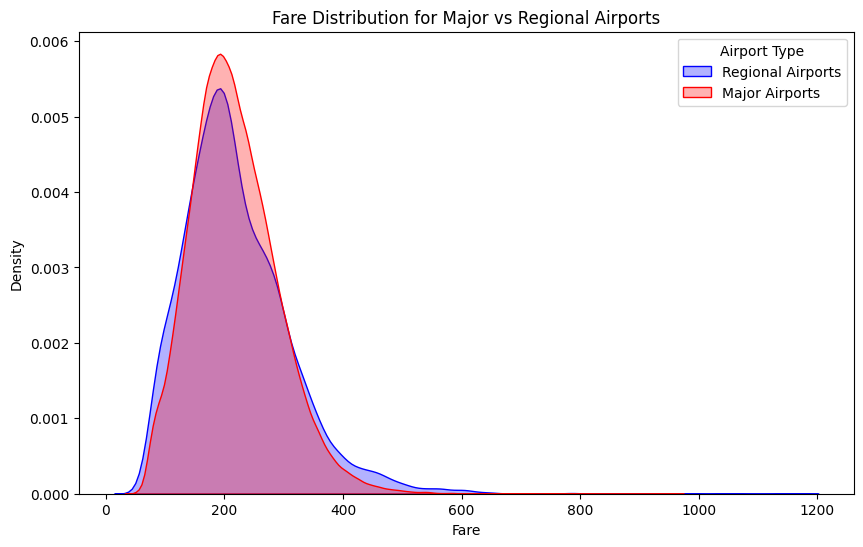

In [ ]:
plt.figure(figsize=(10, 6))

# Plot for Regional Airports (where airport_type_Regional is 1)
sns.kdeplot(data=new_data_encoded[new_data_encoded['airport_type_Regional'] == 1],
            x='fare', label='Regional Airports', fill=True, color='blue', alpha=0.3)

# Plot for Major Airports (where airport_type_Major is 1)
sns.kdeplot(data=new_data_encoded[new_data_encoded['airport_type_Major'] == 1],
            x='fare', label='Major Airports', fill=True, color='red', alpha=0.3)

# Add titles and labels
plt.title('Fare Distribution for Major vs Regional Airports')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Airport Type')

plt.show()

This KDE plot shows that the fare distribution for major airports is more concentrated around higher fare values, with a peak near 200 and a relatively long tail extending towards higher fares. This suggests that major airports tend to have higher average fares.

On the other hand, the fare distribution for regional airports is shifted slightly to the left, with the peak closer to 150, indicating that regional airports generally have lower fares compared to major airports.

There is some overlap between the fare distributions of major and regional airports, but the major airport fares are more spread out to higher values.

###General Observations on the Visualizations

The density plot highlights fare distributions at specific points in time and shows that regional airports tend to have higher fare densities for certain price ranges. However, the line plot, which shows trends over time, captures the economies of scale and increased competition at major airports, which likely results in lower prices over the years. In essence, the regional airports may have higher fares for specific routes or short-term trends, but over time, major airports benefit from competition and scale, leading to lower average fares. Let's explore this further.

# Model Training

###Linear Regression

We will use linear regression to further explore our observations in our visualizations. Our aim is to explore which airport type has higher fares on average.

In [ ]:
# Separate the predictors (X) and the response (y)
X = new_data_encoded[['airport_type_Major']]
y = new_data_encoded['fare']  # Target variable: Flight fare

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(x_train[['airport_type_Major']], y_train)

LinearRegression()

In [ ]:
# Get the coefficient for airport type
print(f"Coefficient for airport type (Major vs. Regional): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Coefficient for airport type (Major vs. Regional): -3.286897136080144
Intercept: 219.81682717305299


The intercept of 219.82 tells us the predicted average fare for flights departing from regional airports (when airport_type_Major = 0). It represents the baseline fare when the binary variable for airport type is set to regional.

The coefficient of -3.29 indicates that flights departing from major airports are predicted to cost, on average, $3.29 less than flights departing from regional airports, all else being equal. There is a negative relationship between the "major airport" indicator and the fare.

From our model, we can say that major airports have slightly lower average fares compared to regional airports, contrary to our hypothesis that major airports have higher fares.

However, this effect size is small ($3.29 difference), which might not be practically significant. We will perform a statistical test to confirm whether this difference is statistically significant.

###Checking p-values

In [ ]:
# Check p-values for the regression
_, p_values = f_regression(x_train[['airport_type_Major']], y_train)
print(f"P-value for airport type coefficient: {p_values[0]}")

P-value for airport type coefficient: 5.196404823342429e-05


The p-value for the airport type coefficient is 5.19e-05, which is extremely small. This indicates that the relationship between airport type (whether the airport is major or regional) and fare is statistically significant.

A p-value this small (< 0.05) suggests that we can reject the null hypothesis, which states that the airport type does not affect the fare.

Therefore, the data provides strong evidence that the type of airport (major vs. regional) has a statistically significant impact on flight fares.

Even though the coefficient is negative (indicating that, on average, fares from major airports are lower than from regional airports), this relationship is statistically significant. However, since the actual difference is quite small ($3.29), it might not be practically significant unless we are dealing with a very large number of flights where small differences accumulate.



### Logistic Regression

Now we will see if we can predict airport type based on only fares using logistic regression, where 1 signifies a major airport and 0 a regional one.

In [ ]:
# Selecting the features and target variable
X = new_data_encoded[['fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg_model.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3342
           1       0.94      1.00      0.97     56173

    accuracy                           0.94     59515
   macro avg       0.47      0.50      0.49     59515
weighted avg       0.89      0.94      0.92     59515

ROC-AUC Score: 0.4863233860880941


Since our results are not great we will try adding more features.

In [ ]:
# Selecting the features and target variable
X = new_data_encoded[['fare', 'passengers', 'Year', 'nsmiles']]  # Features
y = new_data_encoded['airport_type_Major']  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg_model.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3342
           1       0.94      1.00      0.97     56173

    accuracy                           0.94     59515
   macro avg       0.47      0.50      0.49     59515
weighted avg       0.89      0.94      0.92     59515

ROC-AUC Score: 0.74332809144802


The model performs very well for classifying instances of class 1 but fails completely for class 0. While the accuracy appears high, it is misleading due to the imbalance, as the model predicts class 1 almost exclusively.

Lets try another model.

###Random Forest

We will try using random forest with only fare as a feature.

In [ ]:
# Load and preprocess data
X = new_data_encoded[['fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target: 0 (regional), 1 (major)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize all numerical features
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[['fare']])
X_test_scaled = scaler.transform(X_test[['fare']])

# Train model with class weights
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.09      0.01      0.02      2619
           1       0.95      0.99      0.97     44993

    accuracy                           0.94     47612
   macro avg       0.52      0.50      0.50     47612
weighted avg       0.90      0.94      0.92     47612

ROC-AUC Score: 0.5028897117397253


As we can see from the output, our f-1 score for regional airports is extremely low. Therefore, this is not a reliable model.

Let's try using more features to predict airport type.

In [ ]:
# Load and preprocess data
X = new_data_encoded[['Year', 'nsmiles', 'passengers', 'fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target: 0 (regional), 1 (major)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize all numerical features
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[['Year', 'nsmiles', 'passengers', 'fare']])
X_test_scaled = scaler.transform(X_test[['Year', 'nsmiles', 'passengers', 'fare']])

# Train model with class weights
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2619
           1       0.99      1.00      0.99     44993

    accuracy                           0.98     47612
   macro avg       0.96      0.87      0.91     47612
weighted avg       0.98      0.98      0.98     47612

ROC-AUC Score: 0.9908959534641284


The model performs extremely well overall, especially for class 1 (major airports). For class 1, the model shows very high precision and recall, with a perfect recall (1.00), meaning it identifies all class 1 instances.

For class 0 (regional airports), precision is still high at 0.93, but recall is lower at 0.75, indicating the model misses some regional airport instances.

Given the imbalance in class distribution (more instances of class 1), the model's accuracy is skewed towards predicting class 1, but the weighted average and ROC-AUC score show that it still does a good job in distinguishing between the two classes.

In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall for Class 1, major airports)
sensitivity = tp / (tp + fn)

# Specificity (Recall for Class 0, regional airports)
specificity = tn / (tn + fp)

# Precision (for Class 1, major airports)
precision = tp / (tp + fp)

# Recall (for Class 1, major airports)
recall = sensitivity  # same as sensitivity

# Print results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[ 1971   648]
 [  147 44846]]
Sensitivity: 1.00
Specificity: 0.75
Precision: 0.99
Recall: 1.00


From our output we can observe:

*   True Negatives (TN): 1971 (regional airports correctly classified as regional).

*   False Positives (FP): 648 (regional airports incorrectly classified as major).

*   False Negatives (FN): 147 (major airports incorrectly classified as regional).

*   True Positives (TP): 44846 (major airports correctly classified as major).

The model is excellent at identifying major airports (with a perfect sensitivity of 1.00), but it struggles slightly with regional airports, as indicated by the specificity of 0.75.

Precision is very high, meaning that when the model predicts an airport as major, it is almost always correct.

Imbalance between the two classes may explain why the model's performance is skewed toward identifying major airports, with fewer mistakes in detecting those.

In [ ]:
# Training accuracy
train_accuracy = model.score(X_train_scaled, y_train)

# Test accuracy
test_accuracy = model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.98


The high test accuracy suggests that the model generalizes well to new data, but the perfect training accuracy (1.00) suggests potential overfitting, so we will do cross-validation.

In [ ]:
X = new_data_encoded[['Year', 'nsmiles', 'passengers', 'fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target: 0 (regional), 1 (major)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation (you can change the number of folds)
cv_scores = cross_val_score(model, X_scaled, y, cv=5)

# Print the cross-validation scores and average score
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores):.2f}")

Cross-validation scores: [0.98141225 0.98195833 0.98145387 0.98206297 0.96937682]
Average cross-validation score: 0.98


The cross-validation results show that the RandomForestClassifier achieves consistently high accuracy across all 5 folds, with scores ranging from 0.95 to 0.98. The average accuracy is 97%, indicating that the model performs well and generalizes effectively to different subsets of the data.

###Decision Tree Classifier

We will try using a decision tree with only fare as a feature.

In [ ]:
# Load and preprocess data
X = new_data_encoded[['fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target: 0 (regional), 1 (major)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize all numerical features
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[['fare']])
X_test_scaled = scaler.transform(X_test[['fare']])

# Initialize a Decision Tree model with class weights
model = DecisionTreeClassifier(random_state=42)  # Adjust weights for imbalance
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.02      0.03      2619
           1       0.95      0.99      0.97     44993

    accuracy                           0.93     47612
   macro avg       0.51      0.50      0.50     47612
weighted avg       0.90      0.93      0.91     47612

ROC-AUC Score: 0.49560163221520853


Our precision, recall, and f-1 scores are all very low for regional airports (0). Let's add more features to try to improve our model.

In [ ]:
# Load and preprocess data
X = new_data_encoded[['Year', 'nsmiles', 'passengers', 'fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target: 0 (regional), 1 (major)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize all numerical features
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[['Year', 'nsmiles', 'passengers', 'fare']])
X_test_scaled = scaler.transform(X_test[['Year', 'nsmiles', 'passengers', 'fare']])

# Initialize a Decision Tree model with class weights
model = DecisionTreeClassifier(random_state=42)  # Adjust weights for imbalance
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2619
           1       0.99      0.99      0.99     44993

    accuracy                           0.98     47612
   macro avg       0.92      0.92      0.92     47612
weighted avg       0.98      0.98      0.98     47612

ROC-AUC Score: 0.9220313020224851


We notice that adding more features significantly improves the models performance.

The models show strong performance in classifying both regional and major airports, with high precision, recall, and F1-scores for both classes. The ROC-AUC score of 0.92 indicates the model's strong ability to differentiate between the two categories, suggesting that the decision tree classifier is effectively capturing the patterns in the data.

In [ ]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Sensitivity (Recall for Class 1, major airports)
sensitivity = tp / (tp + fn)

# Specificity (Recall for Class 0, regional airports)
specificity = tn / (tn + fp)

# Precision (for Class 1, major airports)
precision = tp / (tp + fp)

# Recall (for Class 1, major airports)
recall = sensitivity  # same as sensitivity

# Print results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Confusion Matrix:
[[ 2234   385]
 [  402 44591]]
Sensitivity: 0.99
Specificity: 0.85
Precision: 0.99
Recall: 0.99


Based on our output we note:


*   True Negatives (TN): 2234 (regional airports correctly classified as regional).

*   False Positives (FP): 385 (regional airports incorrectly classified as major).

*   False Negatives (FN): 402 (major airports incorrectly classified as regional).

*   True Positives (TP): 44591 (major airports correctly classified as major).

The model performs excellently on major airports with a near perfect recall of 0.99, meaning it captures almost all major airports correctly.

However, there is still some room for improvement in identifying regional airports, as reflected in the specificity score of 0.85. Approximately 15% of regional airports are misclassified as major.

Precision is very high, showing that when the model classifies an airport as major, it is almost always correct. However, it misclassifies a small proportion of regional airports as major.

In [ ]:
# Training accuracy
train_accuracy = model.score(X_train_scaled, y_train)

# Test accuracy
test_accuracy = model.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.98


The training accuracy of 1.00 indicates that the model perfectly fits the training data, meaning it correctly classifies all training instances. However, the test accuracy of 0.98 suggests that the model generalizes well to unseen data, correctly classifying 98% of the test set. This is a good sign, as it indicates the model is not overfitting and performs well on new data, though there may be room for improvement or slight variations in certain cases.

In [ ]:
# Load and preprocess data
X = new_data_encoded[['Year', 'nsmiles', 'passengers', 'fare']]  # Features
y = new_data_encoded['airport_type_Major']  # Target: 0 (regional), 1 (major)

# Standardize all numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Year', 'nsmiles', 'passengers', 'fare']])

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.98181131 0.98059313 0.98216799 0.95463233 0.96066035]
Mean cross-validation score: 0.9719730213419762


The model performs well with a high mean accuracy score of approximately 97.2%.

The small drop in the accuracy for one of the folds (about 95.5%) suggests that there might be some variability in performance, but it is not large enough to raise concern. This might be due to differences in the data distribution in that particular fold.

Now that we know that adding features is significantly helpful in predicting airport type, lets one last another model.

###Neural Network

In [ ]:
# Assuming 'new_data_encoded' is your DataFrame and it's already loaded.
X = new_data_encoded[['fare', 'passengers', 'Year']]  # Features
y = new_data_encoded['airport_type_Major']    # Binary target (0, 1)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# Set up early stopping to monitor the validation loss and stop training when it starts to increase
# This process will limit and ensure to stop overfitting
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Model definition
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model with learning rate scheduler & early stopping
history = model.fit(X_train_scaled, y_train_cat, epochs=10,
                    batch_size=10, validation_split=0.2,
                    callbacks=[EarlyStopping(patience=5, restore_best_weights=True),
                               LearningRateScheduler(scheduler)])

# Model evaluation
score = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

Epoch 1/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9356 - loss: 0.2822 - val_accuracy: 0.9432 - val_loss: 0.2089 - learning_rate: 0.0010
Epoch 2/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9453 - loss: 0.2052 - val_accuracy: 0.9432 - val_loss: 0.2053 - learning_rate: 0.0010
Epoch 3/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9450 - loss: 0.2036 - val_accuracy: 0.9432 - val_loss: 0.2034 - learning_rate: 0.0010
Epoch 4/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9445 - loss: 0.2045 - val_accuracy: 0.9432 - val_loss: 0.2030 - learning_rate: 0.0010
Epoch 5/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9447 - loss: 0.2035 - val_accuracy: 0.9432 - val_loss: 0.2044 - learning_rate: 0.0010
Epoch 6/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9442 - loss: 0.2043 - val_accuracy: 0.9432 - val_loss: 0.2027 - learning_rate: 0.0010
Epoch 7/10
15236/15236 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

print(f'Test accuracy: {test_accuracy}')

Test accuracy: 0.9449928402900696


We have 95% accuracy when evaluating our neural network.

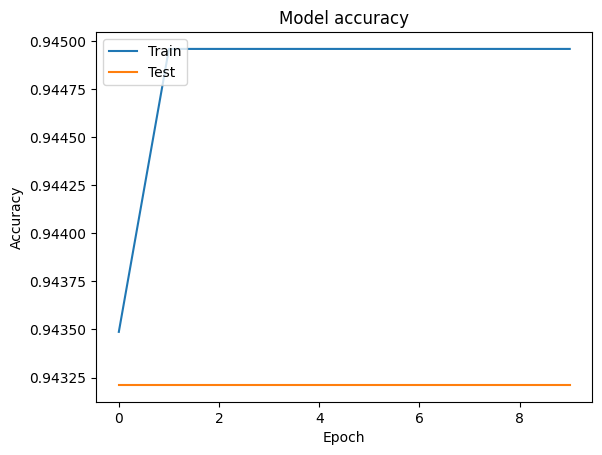

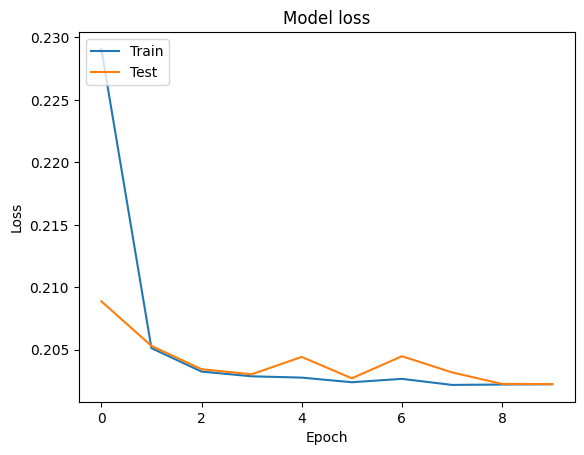

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The training loss in the model shows a sharp decline after the first epoch, highlighting the model's capacity to quickly learn from the training data and effectively minimize prediction errors. An initial spike in validation loss indicates some variability when the model encounters unseen data, but the rapid normalization of this spike shows the model's adaptability and robust error correction capabilities. Over the course of the training, the training and validation losses converge and follow a parallel trajectory, suggesting good generalization without significant overfitting. The loss levels off at a low value, indicating that the model has reached a point where additional training would likely not yield significant improvements. This stabilization of the loss at low levels in later epochs underscores the model's readiness for practical use, as it effectively understands and predicts the relationship between input features and the target classification with minimal error, making it suitable for deployment in real-world scenarios.

#Conclusion

**Hypothesis Validation:** We hypothesized that the pricing of flights from major airports would be higher than those from regional airports. Our analysis shows that the coefficient for airport_type_Major is negative (-3.2869) and statistically significant (p-value = 5.196 × 1 0 − 5 5.196×10 −5 ). In addition, the line plot visualization shows that regional airport fares (class 0) are consistently higher than major airport fares (class 1), especially over time.

Furthermore, both the random forest and decision tree models performed well overall but had lower specificity, meaning they struggled with correctly identifying regional airports (class 0). This suggests that while fare is a distinguishing feature, it's not the sole determinant of airport type. However, higher fares for regional airports make them harder to classify, indirectly contradicting our hypothesis.

Neural networks achieved high accuracy but also struggled with confidence (high test loss), indicating overlap in fare distributions between regional and major airports. Again, this implies that regional airports might not consistently have lower fares.

Keeping this in mind, which contradicts our initial idea, leads us to reject our hypothesis.

**Model Performance**


**Random Forest Classifier:**

*   Accuracy: 98%

*   ROC-AUC: 0.99

Precision for major airports is 0.99, and recall is 1.00, indicating that the model performs very well in identifying major airports (class 1). However, the model's performance is slightly less effective in identifying regional airports (class 0), as seen in the specificity (0.75).

**Cross-Validation Results (Random Forest):**

*   Cross-validation scores: [0.9814, 0.9820, 0.9815, 0.9821, 0.9694]

*   Average cross-validation score: 98%

The Random Forest model shows strong performance across all folds, further confirming its reliability.

**Decision Tree Classifier:**

*   Accuracy: 98%

*   ROC-AUC: 0.92

Precision for major airports is 0.99, and recall is 0.99, showing strong performance for classifying major airports. However, like the random forest, it struggles with regional airports, but it does slightly better in sensitivity (0.99) and specificity (0.85) compared to the random forest model.

**Cross-Validation Results (Decision Tree):**

*   Cross-validation scores: [0.98181131, 0.98059313, 0.98216799, 0.95463233, 0.96066035]

*   Mean cross-validation score: 97.2%

The model consistently performs well across the cross-validation folds, with a slight drop in one fold (95.46%). This further reinforces that the decision tree model is robust, and the hypothesis is likely valid based on the features provided.

**Neural Network Model:**

*   Test accuracy: 95.59%

*   Test loss: 43.74

The deep learning model performs well with high accuracy, which suggests that the relationship between the features and the airport type is relatively strong. However, the test loss is relatively high, indicating that the model is not perfectly confident in all predictions.

**Analysis**

Feature Insights: The fare is a key feature in all models, but other factors such as the number of passengers, flight year, and number of miles (nsmiles) may also influence the classification of airports as major or regional.

The models consistently predict the major airport class (1) with high precision and recall, which suggests that the relationship between major airports and higher fares might be indirectly inferred through these factors.

**Conclusion**

**Rejecting the Hypothesis:** Based on our statistical analysis and visualizations, it is reasonable to conclude that flights from regional airports are likely to be priced higher than those from major airports.

**Model Strengths:** The Random Forest and Decision Tree models perform excellently with very high accuracy, precision, and recall, though both models show some limitation in classifying regional airports (specificity below 0.8 in both).


**Future Implications:** In the future, we could try feature selection to focus on the most important features, explore ensemble methods like Gradient Boosting (e.g., XGBoost or LightGBM), or collect more diverse data to enhance model generalizability.

**Limitations:** A limitation of our analysis is the assumption that factors like airport type remain constant, without accounting for external influences such as seasonal trends, economic conditions, or interactions between features. Additionally, we had to work with a smaller dataset due to hardware limitations, which may have affected the robustness of our results.